# 01. Import Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os

# 02. Import Dataframes

In [2]:
#Defining path
path=r'/Users/guillaumemac/06-2023 Instacart Basket Analysis'

In [3]:
#Importing ords_prods_merged dataframe
df_ords_prods_merged=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged.pkl'))

In [4]:
df_ords_prods_merged.shape

(32404859, 14)

In [5]:
df=df_ords_prods_merged[:1000000]

In [6]:
df.shape

(1000000, 14)

In [7]:
#Define a function
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High-range product'
  else: return 'Not enough data'

In [8]:
#Apply the function
df['price_range']=df.apply(price_label,axis=1)

/var/folders/wm/drxqc4897cz5y2338pz0stxm0000gn/T/ipykernel_6357/1997522383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range']=df.apply(price_label,axis=1)


In [9]:
df['price_range'].value_counts(dropna=False)

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

In [10]:
df['prices'].max()

14.8

In [11]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [12]:
df_ords_prods_merged.loc[(df_ords_prods_merged['prices'] <= 15) & (df_ords_prods_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [13]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [14]:
df_ords_prods_merged['price_range_loc'].value_counts(dropna=False)

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

<Axes: >

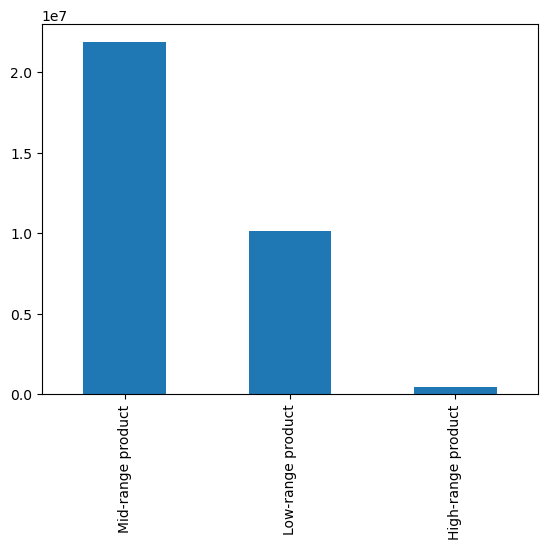

In [16]:
# Creating a bar chart
df_ords_prods_merged['price_range_loc'].value_counts().plot.bar()

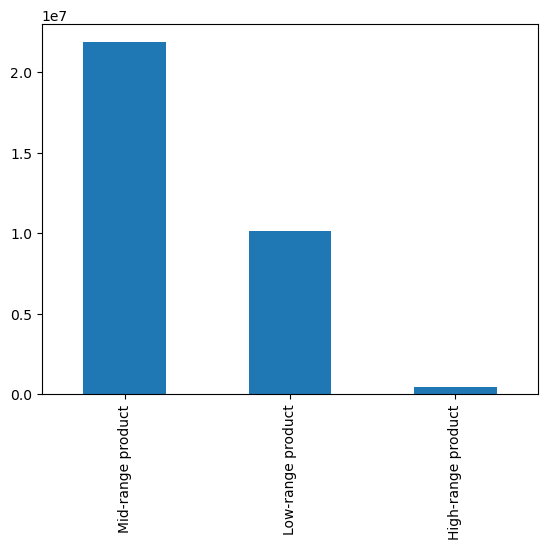

In [17]:
#Defining bar
Product_Range=df_ords_prods_merged['price_range_loc'].value_counts().plot.bar()

In [18]:
#Exporting the bar chart
Product_Range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Product.png'))

In [16]:
df_ords_prods_merged['orders_day_of_the_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_the_week, dtype: int64

In [17]:
result = []

for value in df_ords_prods_merged["orders_day_of_the_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [18]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Reg

In [19]:
df_ords_prods_merged['busiest_day'] = result

In [20]:
df_ords_prods_merged['busiest_day'].value_counts(dropna=False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

# Task 4.7

### Question 2: Suppose your clients have changed their minds about the labels you created in your “busiest_day” column. Now, they want “Busiest day” to become “Busiest days” (plural). This label should correspond with the two busiest days of the week as opposed to the single busiest day. At the same time, they’d also like to know the two slowest days. Create a new column for this using a suitable method.

In [21]:
#Adding new Labels

result_2= []

for value in df_ords_prods_merged["orders_day_of_the_week"]:
  if value == 0 or value== 1:
    result_2.append("Busiest days")
  elif value == 4 or value== 3:
    result_2.append("Slowest days")
  else:
    result_2.append("Regular days")

In [22]:
#creating new "Busiest days" column
df_ords_prods_merged['Busiest days']=result_2

In [136]:
#Dropping the"busiest_day" column that is now replaced with "Busiest days"
df_ords_prods_merged=df_ords_prods_merged.drop('busiest_day',axis=1)

In [137]:
#checking the output
df_ords_prods_merged.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest days
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regular days
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Slowest days
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Slowest days
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Slowest days
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Slowest days


Question 3:
Check the values of this new column for accuracy. Note any observations in markdown format.

In [138]:
#Checking new column for accuracy
df_ords_prods_merged['Busiest days'].value_counts(dropna = False)

Regular days    12916111
Busiest days    11864412
Slowest days     7624336
Name: Busiest days, dtype: int64

###  Obesrvation: Added up all the number for labels and they were accurate

### Question 4: When too many users make Instacart orders at the same time, the app freezes. The senior technical officer at Instacart wants you to identify the busiest hours of the day. Rather than by hour, they want periods of time labeled “Most orders,” “Average orders,” and “Fewest orders.” Create a new column containing these labels called “busiest_period_of_day.”

In [139]:
# Check frequency of values in the "order_hour_of_day" column 
df_ords_prods_merged['order_hour_of_day'].value_counts()

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

#### We can group the 24 hours of the day as follows: Most orders = 10, 11, 14, 15, 13, 12, 16, 9; Average orders = 17, 8, 18, 19, 20, 7, 21, 22; Fewest orders = 23, 6, 0, 1, 5, 2, 4, 3. This will allow us to follow the senior technical officer grouping request.

In [140]:
#Adding new labels
hours= []

for hour in df_ords_prods_merged["order_hour_of_day"]:
  if hour in [10,11,14,15,13,12,16,9]:
    hours.append("Most orders")
  elif hour in [23,6,0,1,5,2,4,3]:
    hours.append("Fewest orders")
  else:
    hours.append("Average orders")

In [141]:
#Creating “busiest_period_of_day.” column
df_ords_prods_merged['busiest_period_of_day']= hours

In [142]:
#Check the output for both 'order_hour_of_day' and 'busiest_period_of_day'
df_ords_prods_merged[['order_hour_of_day','busiest_period_of_day']].head(10)

,order_hour_of_day,busiest_period_of_day
0,8,Average orders
1,7,Average orders
2,12,Most orders
3,7,Average orders
4,15,Most orders
5,7,Average orders
6,9,Most orders
7,14,Most orders
8,16,Most orders
9,8,Average orders


In [144]:
#Printing frequency for 'busiest_period_of_day'
df_ords_prods_merged['busiest_period_of_day'].value_counts()

Most orders       21118071
Average orders     9997651
Fewest orders      1289137
Name: busiest_period_of_day, dtype: int64

### Observation: Added up the numbers just to double check and it all added up accuretly

In [145]:
# Exporting dataframe as pkl file
df_ords_prods_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods.pkl'))